In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np

In [3]:
building_df =  pd.read_csv("de_normalized_data.csv")
building_df.head(15)

,company_id,company,CardNumber,DirectionOfEntry,ServerDateTime,DoorName
0,111102,ABC121,20081,IN,1/8/2019 1:14,20th Floor NETPOP #1
1,111102,ABC121,20081,IN,1/8/2019 1:15,Frieght Elevator S1 Cab
2,111102,ABC121,20081,IN,1/8/2019 1:15,Frieght Elevator S1 Cab
3,111102,ABC121,20081,IN,1/8/2019 1:17,Frieght Elevator S1 Cab
4,111102,ABC121,20081,IN,1/8/2019 1:21,GND Floor Garage Entry
5,111102,ABC121,20081,IN,1/8/2019 1:25,1st Floor Lobby to Dock West
6,111102,ABC121,20081,IN,1/8/2019 1:31,Freight Elevator S2 Cab
7,111102,ABC121,20081,IN,1/8/2019 1:33,Freight Elevator S2 Cab
8,111102,ABC121,20081,IN,1/8/2019 1:34,20th Floor Staff Engineers Rm
9,111102,ABC121,20081,IN,1/8/2019 1:49,20th Floor Staff Engineers Rm


In [4]:
# df = bulding_data.dropna(how='all')
building_df = building_df[building_df.CardNumber > 0]

building_df['ServerDateTime'] = pd.to_datetime(building_df['ServerDateTime'])
building_df['Date'] = pd.to_datetime(building_df['ServerDateTime'].dt.strftime('%m/%d/%Y'))
# df['Time'] = df['MessageDateTime'].dt.strftime('%H:%M:%S')
building_df['Time'] = pd.to_numeric(building_df['ServerDateTime'].dt.strftime('%H'))
building_df['Minutes'] = building_df['ServerDateTime'].dt.strftime('%M')
building_df['DayOfMonth'] = building_df['ServerDateTime'].dt.strftime("%d")
building_df['WeekDay'] = building_df['ServerDateTime'].dt.weekday
building_df.head()
#  df['datetime'].dt.round("1h")

,company_id,company,CardNumber,DirectionOfEntry,ServerDateTime,DoorName,Date,Time,Minutes,DayOfMonth,WeekDay
0,111102,ABC121,20081,IN,2019-01-08 01:14:00,20th Floor NETPOP #1,2019-01-08,1,14,08,1
1,111102,ABC121,20081,IN,2019-01-08 01:15:00,Frieght Elevator S1 Cab,2019-01-08,1,15,08,1
2,111102,ABC121,20081,IN,2019-01-08 01:15:00,Frieght Elevator S1 Cab,2019-01-08,1,15,08,1
3,111102,ABC121,20081,IN,2019-01-08 01:17:00,Frieght Elevator S1 Cab,2019-01-08,1,17,08,1
4,111102,ABC121,20081,IN,2019-01-08 01:21:00,GND Floor Garage Entry,2019-01-08,1,21,08,1


In [5]:
company_df = building_df[['company','CardNumber', 'DoorName', 'Date','Time','DayOfMonth', 'WeekDay']]
company_df.head()
company_df = company_df[company_df.company == 'ABC151']
company_df.head()

,company,CardNumber,DoorName,Date,Time,DayOfMonth,WeekDay
1413,ABC151,159285,Lowrise Turnstile #3,2019-01-09,9,09,2
1453,ABC151,159908,Lowrise Turnstile #3,2019-01-09,9,09,2
1725,ABC151,159890,Lowrise Turnstile #3,2019-01-09,10,09,2
1730,ABC151,159223,Lowrise Turnstile #3,2019-01-09,10,09,2
1911,ABC151,159555,Lowrise Turnstile #3,2019-01-09,11,09,2


In [173]:
groupd_df = company_df[(company_df.Time > "04") & (company_df.Time < "23")].sort_values('CardNumber').groupby(['company','Time'])['Time'].first().reset_index()
groupd_df

TypeError: Invalid comparison between dtype=int64 and str

In [236]:
grouped_df.WeekDay.unique()

array([2, 3, 4, 1, 5], dtype=int64)

In [222]:

# (df.groupby(['cluster', 'org'], as_index=False).mean()
#             .groupby('cluster')['time'].mean())

grouped_df = company_df[(company_df.Time > 6) & (company_df.Time < 18)].sort_values('Date').groupby(['company','CardNumber','DayOfMonth']).first().reset_index()
#.mean().groupby('CardNumber')['Time']
grouped_df = grouped_df[(grouped_df.WeekDay != 0) & (grouped_df.WeekDay != 6)].sort_values(['Date','Time','CardNumber'])
grouped_df

,company,CardNumber,DayOfMonth,DoorName,Date,Time,WeekDay
34,ABC151,159285,09,Lowrise Turnstile #3,2019-01-09,9,2
164,ABC151,159908,09,Lowrise Turnstile #3,2019-01-09,9,2
142,ABC151,159890,09,Lowrise Turnstile #3,2019-01-09,10,2
40,ABC151,159490,09,Lowrise Turnstile #3,2019-01-09,12,2
16,ABC151,159223,09,Lowrise Turnstile #2,2019-01-09,13,2
61,ABC151,159555,09,Lowrise Turnstile #3,2019-01-09,15,2
41,ABC151,159490,10,Lowrise Turnstile #3,2019-01-10,8,3
143,ABC151,159890,10,Lowrise Turnstile #3,2019-01-10,9,3
1,ABC151,159139,10,Lowrise Turnstile #2,2019-01-10,11,3
33,ABC151,159257,10,Lowrise Turnstile #3,2019-01-10,12,3


In [223]:
company_df.dtypes

company               object
CardNumber             int64
DoorName              object
Date          datetime64[ns]
Time                   int64
DayOfMonth            object
WeekDay                int64
dtype: object

In [224]:
dayData = grouped_df[grouped_df.Date == '2019-01-09']
dayData

,company,CardNumber,DayOfMonth,DoorName,Date,Time,WeekDay
34,ABC151,159285,09,Lowrise Turnstile #3,2019-01-09,9,2
164,ABC151,159908,09,Lowrise Turnstile #3,2019-01-09,9,2
142,ABC151,159890,09,Lowrise Turnstile #3,2019-01-09,10,2
40,ABC151,159490,09,Lowrise Turnstile #3,2019-01-09,12,2
16,ABC151,159223,09,Lowrise Turnstile #2,2019-01-09,13,2
61,ABC151,159555,09,Lowrise Turnstile #3,2019-01-09,15,2


In [6]:
mean_data = grouped_df.groupby(['Date'])['Time'].median().reset_index()
mean_data.head()

NameError: name 'grouped_df' is not defined

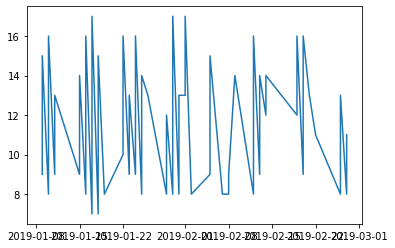

In [254]:
plt.plot(grouped_df['Date'].to_numpy(),grouped_df['Time'].to_numpy())

In [244]:
X = groupd_df["CardNumber"].values.reshape(-1, 1)
print(X.shape)

(3395, 1)


In [245]:
y = groupd_df['Time'].values.reshape(-1,1)
print(y.shape)

(3395, 1)


In [246]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

In [247]:
# Create the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [248]:
# Fit the model to the training data. 

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [249]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

In [250]:
predicted

array([[13.20427544],
       [13.20846862],
       [13.21001348],
       ...,
       [13.2373795 ],
       [12.57000171],
       [13.2195033 ]])

In [251]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 14.934995030362069
R-squared (R2 ): -0.005552770065242463


In [252]:
model.score(X_test, y_test)

-0.005552770065242463